In [3]:
import pandas as pd

data = pd.read_csv("Linhac24-25_Sportlogiq.csv")
colnames = data.columns.to_list()
colnames

['gameid',
 'opposingteamgoalieoniceid',
 'opposingteamid',
 'playerid',
 'teamgoalieoniceid',
 'teamid',
 'teaminpossession',
 'currentpossession',
 'xg_allattempts',
 'compiledgametime',
 'eventname',
 'ishomegame',
 'manpowersituation',
 'opposingteamskatersonicecount',
 'outcome',
 'period',
 'playerprimaryposition',
 'scoredifferential',
 'teamskatersonicecount',
 'type',
 'xadjcoord',
 'yadjcoord']

In [4]:
# 很多术语和黑话
# count_value然后统计一下
event_terms = data['eventname'].value_counts().index.to_list()
type_terms = data['type'].value_counts().index.to_list()
event_terms_dict = {
    "pass": "传球",
    "lpr": "长传",
    "reception": "接球",
    "carry": "持球推进",
    "controlledexit": "带球出本方防区",
    "puckprotection": "护球",
    "block": "封堵射门或传球",
    "faceoff": "争球",
    "shot": "射门",
    "controlledentry": "带球进攻区",
    "controlledentryagainst": "被带球进入己方防区",
    "dumpout": "将球甩出本方防区",
    "dumpin": "将球甩入对方防区",
    "save": "扑球",
    "check": "对抗）",
    "rebound": "篮板",
    "assist": "助攻",
    "icing": "死球（长传不过中线直接进攻区）",
    "goal": "进球",
    "penalty": "犯规",
    "penaltydrawn": "造犯规",
    "offside": "越位",
    "soshot": "点球大战射门",
    "sogoal": "点球大战进球）",
    "sopuckprotection": "点球大战护球"
}
type_terms_dict = {
    # 一般术语
    "regular": "常规",
    "none": "无",
    "contested": "争夺（有对抗）",
    "error": "失误",
    "recovered": "抢回控球权",
    "ice": "冰面（可能指全场）",
    "first": "第一（可能指首轮、首节等）",
    "second": "第二（可能指次轮、次节等）",
    
    # 传球相关
    "pass": "传球",
    "passwithplay": "传球并参与进攻",
    "passwithplaywithshotonnet": "传球并参与进攻且射正",
    "passwithplaywithshotonnetandslotshot": "传球并参与进攻，射正且在槽区（slot）射门",
    "passwithslotshot": "传球并在槽区射门",
    "passwithshotonnet": "传球并射正",
    "passwithshotonnetandslotshot": "传球并射正且在槽区射门",
    
    # 带球相关
    "carry": "控球推进",
    "carrywithplay": "带球并参与进攻",
    "carrywithplaywithshotonnet": "带球参与进攻并射正",
    "carrywithplaywithshotonnetandslotshot": "带球参与进攻，射正且在槽区射门",
    "carrywithplaywithslotshot": "带球参与进攻并在槽区射门",
    "carrywithshotonnet": "带球并射正",
    "carrywithshotonnetandslotshot": "带球射正且在槽区射门",
    "carrywithslotshot": "带球并在槽区射门",

    # 进攻/出区相关
    "ozentry": "进攻区进入",
    "ozentryoffboards": "沿边墙进入进攻区",
    "ozentrystretch": "长距离进攻区进入",
    "ozentrystretchoffboards": "沿边墙长距离进入进攻区",
    
    # dump（甩球）相关
    "dump": "甩球",
    "opdump": "对手甩球",
    "opdumpcontested": "对手甩球并发生争夺",
    "hipresopdump": "高位压迫导致对手甩球",
    "hipresopdumpcontested": "高位压迫导致对手甩球并发生争夺",
    
    # 传球方向
    "north": "向前（北向）",
    "south": "向后（南向）",
    "northoffboards": "沿边墙向前传球",
    "southoffboards": "沿边墙向后传球",
    "eastwest": "横向传球",
    "eastwestoffboards": "沿边墙横向传球",
    
    # 争球（Faceoff）
    "faceoff": "争球",
    "faceoffcontested": "争球争夺",
    
    # 其他进攻术语
    "slot": "槽区（高危射门区域）",
    "slotblocked": "槽区射门被封堵",
    "outside": "外围（远离槽区）",
    "outsideblocked": "外围射门被封堵",
    "rush": "快速进攻",
    
    # 失误/抢回相关
    "errorcontested": "失误且被争夺",
    "recoveredwithexit": "抢回控球权并出区",
    "recoveredwithentry": "抢回控球权并进攻区进入",
    "recoveredwithshotonnet": "抢回控球权并射正",
    "recoveredwithshotonnetandslotshot": "抢回控球权并射正且在槽区射门",
    "recoveredwithslotshot": "抢回控球权并在槽区射门",
    
    # 物理对抗
    "body": "身体对抗",
    "stick": "球杆对抗",
    "check": "冲撞",
    
    # 1v1, 2v2 等
    "1on0": "一对零",
    "1on1": "一对一",
    "1on2": "一对二",
    "2on1": "二对一",
    "2on2": "二对二",
    "2on3": "二对三",
    "3on1": "三对一",
    "3on2": "三对二",
    "3on3": "三对三",
    
    # 犯规相关
    "tripping": "绊人",
    "hooking": "勾人",
    "holding": "拉扯",
    "slashing": "挥杆犯规",
    "interference": "阻挡",
    "highsticking": "高杆击打",
    "crosschecking": "双手推杆犯规",
    "boarding": "推撞犯规",
    "goalieinterference": "干扰守门员",
    "holdingthestick": "抓住对方球杆",
    "delayofgame": "延误比赛",
    "unsportsmanlikeconduct": "违反体育道德",
    "kneeing": "膝撞",
    "illegalchecktothehead": "头部非法冲撞",
    "charging": "蓄意冲撞",
    "elbowing": "肘击",
    "otherinfraction": "其他犯规",
    "otherundisciplined": "其他违规行为",
    "toomanymen": "场上人数过多",
    "puckoverglass": "将球直接打出场外"
}


In [5]:
# 观察event和type这两列的组合值的计数
combinations = data.value_counts(subset=['eventname', 'type', 'outcome']).reset_index(name='count')
combinations.to_csv("combinations_counts.csv", index=False, sep='\t')
print(combinations)

            eventname                type     outcome  count
0           reception             regular  successful  94740
1               carry                none  successful  33914
2                 lpr                none  successful  33793
3                 lpr           contested      failed  21455
4                pass               south  successful  18495
..                ...                 ...         ...    ...
197      penaltydrawn  otherundisciplined  successful      1
198  sopuckprotection                deke  successful      1
199            soshot             outside      failed      1
200            soshot             outside  successful      1
201      penaltydrawn            elbowing  successful      1

[202 rows x 4 columns]


In [6]:
# 某一队持球时，事件发生的位置
# game list
# game id 作为主键的关系
game_col = data['gameid']
games = game_col.value_counts().index.to_list()
game1_id = 64485
# print(games)
game1 = data.loc[data['gameid']==game1_id] 
# team list
team1, team2 = game1['teamid'].value_counts().index.to_list()

# team1 持球位置
position_cols = ['teaminpossession', 'period' ,'compiledgametime' , 'xadjcoord', 'yadjcoord']
position = ['xadjcoord', 'yadjcoord']
position1 = game1.query(f'teaminpossession == {team1}')[position_cols]
position2 = game1.query(f'teaminpossession == {team2}')[position_cols]
position1.head(5)


,teaminpossession,period,compiledgametime,xadjcoord,yadjcoord
94503,885.0,1,0.44,-0.708763,1.262848
94504,885.0,1,0.48,-0.708763,1.262848
94505,885.0,1,1.24,-28.873466,5.286381
94506,885.0,1,2.60,-35.914642,3.777557
94507,885.0,1,3.12,-37.926411,-17.848915


In [7]:
import pandas as pd

# 假设原始数据已加载为data DataFrame
# data = pd.read_csv('your_data.csv')

# ==================== 基础信息聚合 ==================== 
player_info = data.groupby('playerid').agg(
    # 使用first()基于假设：球员在同一数据集中不更换队伍
    team_id=('teamid', 'first'),  # 所属队伍ID
    primary_position=('playerprimaryposition', 'first'),  # 主要场上位置
    
    # 比赛参与度指标
    total_games=('gameid', 'nunique'),  # 参与的不同比赛数量
    total_time=('compiledgametime', lambda x: x.max() - x.min()),  # 总出场时间（需确认时间计算逻辑）
    
    # 进攻指标
    total_shots=('eventname', lambda x: x.isin(['shot','soshot']).sum()),  # 总射门次数
    goals=('eventname', lambda x: x.isin(['goal','sogoal']).sum()),  # 进球数
    controlled_entries=('eventname', lambda x: x.isin(['controlledentry']).sum()),  # 控球进入进攻区次数
    
    # 传球指标
    total_passes=('type', lambda x: x.str.contains('pass').sum()),  # 所有类型传球尝试
    successful_passes=('outcome', lambda x: (x == 'successful').sum()),  # 成功传球次数
    
    # 控球指标
    carries=('type', lambda x: x.str.contains('carry').sum()),  # 所有带球动作
    successful_carries=('type', lambda x: x.isin(['carry','carrywithplay']).sum()),  # 成功带球
    
    # 防守指标
    blocks=('eventname', lambda x: x.isin(['block']).sum()),  # 封堵次数
    checks=('eventname', lambda x: x.isin(['check']).sum()),  # 冲撞次数
    
    # 特殊事件
    faceoffs_won=('type', lambda x: x.str.contains('faceoff').sum()),  # 争球胜利
    penalties=('eventname', lambda x: x.isin(['penalty']).sum())  # 犯规次数
).reset_index().rename(columns={'playerid':'player_id'})  # 明确设置主键列名

# ==================== 队伍对抗信息 ====================
team_stats = data.groupby(['playerid', 'teamid']).agg(
    avg_teammates=('teamskatersonicecount', 'mean'),  # 平均队友数量
    avg_opponents=('opposingteamskatersonicecount', 'mean'),  # 平均对手数量
    most_common_opponent=('opposingteamid', lambda x: x.mode()[0])  # 最常见对手
).reset_index().rename(columns={'playerid':'player_id'})

# ==================== 合并数据 ====================
player_info = pd.merge(
    player_info,
    team_stats,
    left_on=['player_id', 'team_id'],
    right_on=['player_id', 'teamid']
).drop(columns='teamid')

# ==================== 计算衍生指标 ====================
# 成功率类指标
player_info['shot_success_rate'] = player_info['goals'] / player_info['total_shots'].replace(0, 1)  # 防止除零
player_info['pass_success_rate'] = player_info['successful_passes'] / player_info['total_passes'].replace(0, 1)

# 高级复合指标
player_info['possession_quality'] = (
    player_info['controlled_entries'] * 0.3 +
    player_info['successful_carries'] * 0.2 +
    player_info['successful_passes'] * 0.5
)

player_info['defensive_score'] = (
    player_info['blocks'] * 1.2 +
    player_info['checks'] * 0.8 -
    player_info['penalties'] * 1.5
)

# 空间利用率指标（需要处理可能的空值）
zone_data = data.groupby('playerid')['xadjcoord'].mean().reset_index().rename(columns={
    'playerid':'player_id',
    'xadjcoord':'offensive_zone_ratio'
})
player_info = pd.merge(player_info, zone_data, on='player_id', how='left')

# ==================== 最终整理 ====================
# 设置主键
player_info.set_index('player_id', inplace=True)

# 处理可能的空值
player_info.fillna({
    'shot_success_rate': 0,
    'pass_success_rate': 0,
    'offensive_zone_ratio': data['xadjcoord'].median()
}, inplace=True)

# 列排序优化
column_order = [
    'team_id', 'primary_position', 'total_games', 'total_time',
    'total_shots', 'goals', 'shot_success_rate', 
    'total_passes', 'successful_passes', 'pass_success_rate',
    'carries', 'successful_carries', 'controlled_entries',
    'blocks', 'checks', 'penalties', 'faceoffs_won',
    'avg_teammates', 'avg_opponents', 'most_common_opponent',
    'possession_quality', 'defensive_score', 'offensive_zone_ratio'
]
player_info = player_info[column_order]
# 保存结果
player_info.to_csv('player_analytics.csv')



In [8]:
# ==================== 使用示例 ====================
# 查看前5名球员
player_info.head()
# 如果你想拉下来玩一玩，把这个注释去掉
# team_stats.to_csv('player_analytics.csv')


,team_id,primary_position,total_games,total_time,total_shots,goals,shot_success_rate,total_passes,successful_passes,pass_success_rate,...,blocks,checks,penalties,faceoffs_won,avg_teammates,avg_opponents,most_common_opponent,possession_quality,defensive_score,offensive_zone_ratio
player_id,,,,,,,,,,,,,,,,,,,,,
1338,524,F,16,3509.68,15,1,0.066667,65,493,7.584615,...,24,7,1,17,4.951735,5.001508,634,258.6,32.9,2.954695
2099,877,F,1,2205.28,0,0,0.000000,2,25,12.500000,...,0,0,0,1,5.000000,5.000000,628,13.0,0.0,-2.800346
3467,503,D,22,3888.16,54,0,0.000000,104,1743,16.759615,...,95,46,7,23,4.948730,4.993533,825,883.3,140.3,-37.049500
5038,877,F,22,3876.36,99,13,0.131313,149,1645,11.040268,...,50,28,4,27,4.992165,4.839373,795,856.9,76.4,28.733050
10739,628,G,4,3832.88,0,0,0.000000,5,230,46.000000,...,2,1,0,0,4.904594,4.918728,877,115.0,3.2,-75.583278


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ====================
# 1. 进攻分类定义模块
# ====================
"""
进攻方式分类标准：
1. Playmaking (组织进攻) - 传球创造机会
   - 包含指标：total_passes, successful_passes, pass_success_rate
   
2. Shooting (射门威胁) - 直接得分能力
   - 包含指标：total_shots, goals, shot_success_rate
   
3. Breakthrough (突破控球) - 持球推进能力
   - 包含指标：carries, successful_carries, controlled_entries
   
4. Special (特殊战术) - 关键对抗能力
   - 包含指标：faceoffs_won
"""

# ====================
# 进攻画像生成函数
# ====================
# ====================
# 2. 进攻画像生成函数
# ====================
def create_attack_profile(player_df, attack_categories):
    """
    生成球员进攻画像（适配当前数据结构版）
    参数：
        player_df: 包含以下字段的DataFrame：
            - total_passes, successful_passes, pass_success_rate
            - total_shots, goals, shot_success_rate
            - carries, successful_carries, controlled_entries
            - faceoffs_won
    """
    profile = player_df[[]].copy()  # 创建空框架保留索引
    
    # 通用指标处理
    for category in ['playmaking', 'shooting', 'breakthrough']:
        attempts, success, rate = attack_categories[category]
        profile[f'{category}_attempts'] = player_df[attempts]
        profile[f'{category}_success'] = player_df[success]
        profile[f'{category}_rate'] = player_df[rate]
    
    # 特殊分类处理（仅展示次数）
    profile['special_attempts'] = player_df['faceoffs_won']  # 直接使用获胜次数
    profile['special_success'] = player_df['faceoffs_won']   # 无失败数据时设为相同值
    profile['special_rate'] = 1.0  # 成功率设为100%（因无失败记录）

    # 计算进攻方式占比
    total_attempts = profile.filter(like='_attempts').sum(axis=1)
    for category in attack_categories.keys():
        profile[f'{category}_ratio'] =profile[f'{category}_attempts'] / total_attempts.replace(0, 1)
    
    return profile

# ====================
# 3. 可视化函数调整
# ====================
def plot_attack_profile(player_id, profile_df, player_info):
    """
    优化后的可视化函数
    """
    # 获取数据
    try:
        player_data = profile_df.loc[player_id]
        base_info = player_info.loc[player_id]
    except KeyError:
        print(f"Player ID {player_id} does not exist")
        return

    # 创建画布
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 进攻方式分布饼图
    categories = list(attack_categories.keys())
    ratios = [player_data[f'{cat}_ratio'] for cat in categories]
    labels = [f"{cat.capitalize()}\n({rat*100:.1f}%)" for cat, rat in zip(categories, ratios)]
    ax[0, 0].pie(ratios, labels=labels, autopct='%1.1f%%')
    ax[0, 0].set_title('Attack Methods')

    # 2. 关键指标雷达图
    success_rates = [player_data[f'{cat}_rate'] * 100 for cat in categories]
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    success_rates += success_rates[:1]
    
    ax[0, 1].plot(angles, success_rates, 'o-')
    ax[0, 1].fill(angles, success_rates, alpha=0.25)
    ax[0, 1].set_xticks(angles[:-1])
    ax[0, 1].set_xticklabels([cat.capitalize() for cat in categories])
    ax[0, 1].set_title('Success Rate Radar (%)')

    # 3. 核心指标对比
    metrics = {
        'Shots 4 Game': base_info['total_shots'] / base_info['total_games'],
        'Pass Success Rate': player_data['playmaking_rate'] * 100,
        'Breakthrough': player_data['breakthrough_attempts'],
        'Face Off Won': player_data['special_attempts']
    }
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=ax[1, 0])
    ax[1, 0].set_title('Core Performance')
    ax[1, 0].tick_params(axis='x', rotation=45)

    # 4. 数据表格
    table_data = [
        ["Performance", "Attempts", "Successful Rate"],
        ["Origanazation", 
         int(player_data['playmaking_attempts']), 
         f"{player_data['playmaking_rate']*100:.1f}%"],
        ["Shooting Threats", 
         int(player_data['shooting_attempts']), 
         f"{player_data['shooting_rate']*100:.1f}%"],
        ["Breakthrough", 
         int(player_data['breakthrough_attempts']), 
         f"{player_data['breakthrough_rate']*100:.1f}%"],
        ["Special", 
         int(player_data['special_attempts']), 
         "N/A"]  # 特殊分类无成功率数据
    ]
    ax[1, 1].axis('off')
    table = ax[1, 1].table(
        cellText=table_data,
        colWidths=[0.3, 0.3, 0.4],
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()

# 生成进攻画像
attack_categories = {
    'playmaking': ['total_passes', 'successful_passes', 'pass_success_rate'],
    'shooting': ['total_shots', 'goals', 'shot_success_rate'],
    'breakthrough': ['carries', 'successful_carries', 'controlled_entries'],
    'special': ['faceoffs_won']  # 特殊处理需调整原始数据
}


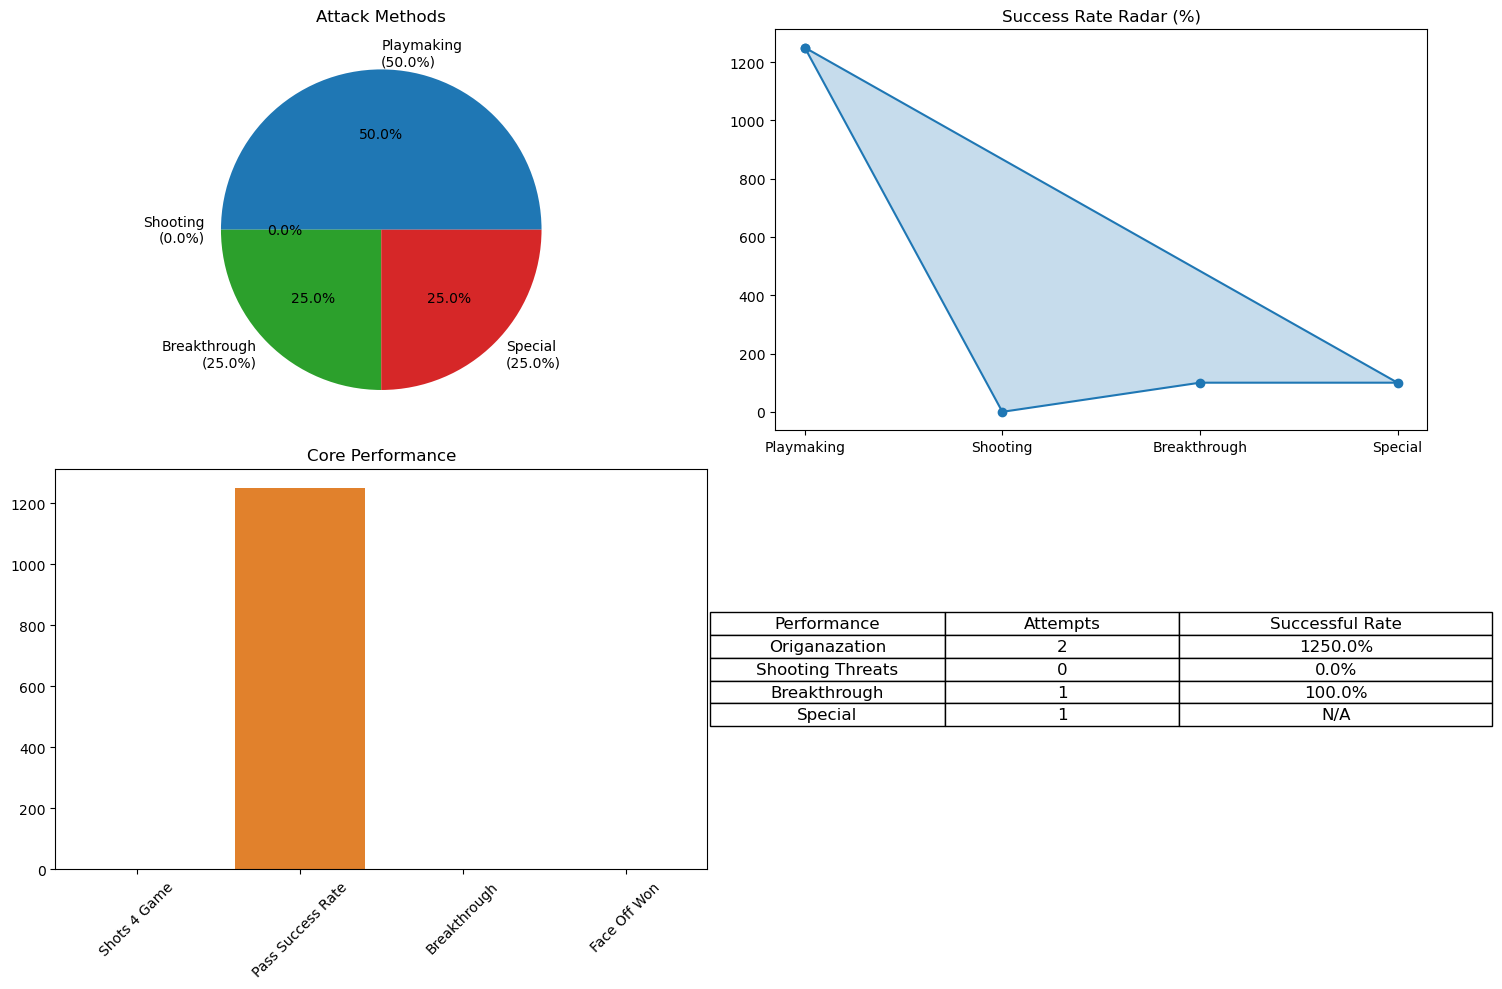

In [10]:
attack_profile = create_attack_profile(player_info, attack_categories)

# 可视化示例（使用索引定位）
plot_attack_profile(2099, attack_profile, player_info)


现在我想做一些球队的进攻策略分析，后面生成的数据用来训练预测获胜概率的话解释性应该会更强一点

In [11]:
import numpy as np
# 以球队为主键的进攻信息
# ====================
# 函数1：生成球队进攻数据
# ====================
def create_team_offense_stats(data):
    """
    生成以teamid为主键的球队进攻数据
    参数：
        data: 原始比赛数据
    返回：
        team_stats DataFrame
    """
    # 基本进攻指标
    team_stats = data.groupby('teamid').agg(
        # 射门相关
        shots_total=('eventname', lambda x: x.isin(['shot', 'soshot']).sum()),
        shots_successful=('outcome', lambda x: ((data['eventname'].isin(['shot', 'soshot'])) & (x == 'successful')).sum()),
        
        # 传球相关
        passes_total=('type', lambda x: x.str.contains('pass').sum()),
        passes_successful=('outcome', lambda x: ((data['type'].str.contains('pass')) & (x == 'successful')).sum()),
        
        # 控球突破
        controlled_entries=('eventname', lambda x: x.isin(['controlledentry']).sum()),
        breakthroughs=('type', lambda x: x.str.contains('carry').sum()),
        
        # 特殊战术
        faceoffs_won=('type', lambda x: x.str.contains('faceoff').sum()),
        powerplay_attempts=('manpowersituation', lambda x: x.str.contains('powerplay').sum())
    )
    
    # 计算成功率指标
    team_stats['shots_success_rate'] = team_stats['shots_successful'] / team_stats['shots_total'].replace(0, 1)
    team_stats['passes_success_rate'] = team_stats['passes_successful'] / team_stats['passes_total'].replace(0, 1)
    
    # 高级指标
    team_stats['possession_quality'] = (
        team_stats['controlled_entries'] * 0.3 +
        team_stats['breakthroughs'] * 0.2 +
        team_stats['passes_successful'] * 0.5
    )
    
    # 重置索引并排序
    team_stats = team_stats.reset_index().set_index('teamid')
    return team_stats

# ====================
# 函数2：生成比赛数据
# ====================
def create_game_stats(data):
    """
    生成以gameid为主键的比赛数据（包含两队统计和结果）
    参数：
        data: 原始比赛数据
    返回：
        game_stats DataFrame
    """
    # 生成每场比赛每队的基础数据
    game_team_stats = data.groupby(['gameid', 'teamid']).agg(
        shots=('eventname', lambda x: x.isin(['shot', 'soshot']).sum()),
        goals=('eventname', lambda x: x.isin(['goal', 'sogoal']).sum()),
        passes=('type', lambda x: x.str.contains('pass').sum()),
        faceoffs_won=('type', lambda x: x.str.contains('faceoff').sum()),
        xg_total=('xg_allattempts', 'sum')
    ).reset_index()

    # 添加主客场标识
    home_teams = data[data['ishomegame'] == 1].groupby('gameid')['teamid'].first().reset_index(name='home_team')
    away_teams = data[data['ishomegame'] == 0].groupby('gameid')['teamid'].first().reset_index(name='away_team')
    
    # 合并主客场信息
    game_stats = pd.merge(home_teams, away_teams, on='gameid')
    
    # 合并主队数据
    game_stats = pd.merge(game_stats, 
                         game_team_stats, 
                         left_on=['gameid', 'home_team'],
                         right_on=['gameid', 'teamid'],
                         suffixes=('', '_home'))
    
    # 合并客队数据
    game_stats = pd.merge(game_stats, 
                         game_team_stats, 
                         left_on=['gameid', 'away_team'],
                         right_on=['gameid', 'teamid'],
                         suffixes=('_home', '_away'))
    
    # 清理列名
    game_stats = game_stats.drop(columns=['teamid_home', 'teamid_away'])
    
    # 计算比赛结果
    conditions = [
        (game_stats['goals_home'] > game_stats['goals_away']),
        (game_stats['goals_home'] < game_stats['goals_away'])
    ]
    choices = ['home_win', 'away_win']
    game_stats['result'] = np.select(conditions, choices, default='draw')
    
    # 设置索引
    game_stats = game_stats.set_index('gameid')
    
    # 列排序优化
    column_order = [
        'home_team', 'away_team',
        'shots_home', 'shots_away',
        'goals_home', 'goals_away',
        'passes_home', 'passes_away',
        'faceoffs_won_home', 'faceoffs_won_away',
        'xg_total_home', 'xg_total_away',
        'result'
    ]
    return game_stats[column_order]


In [16]:
team_stats = create_team_offense_stats(data)
print(team_stats.columns)

# 生成比赛数据
game_stats = create_game_stats(data)
print(game_stats.columns)

# 如果你想拉下来玩一玩，把这个注释去掉
# 保存结果
# team_stats.to_csv('team_offense_stats.csv')
game_stats.to_csv('game_stats.csv')


Index(['shots_total', 'shots_successful', 'passes_total', 'passes_successful',
       'controlled_entries', 'breakthroughs', 'faceoffs_won',
       'powerplay_attempts', 'shots_success_rate', 'passes_success_rate',
       'possession_quality'],
      dtype='object')
Index(['home_team', 'away_team', 'shots_home', 'shots_away', 'goals_home',
       'goals_away', 'passes_home', 'passes_away', 'faceoffs_won_home',
       'faceoffs_won_away', 'xg_total_home', 'xg_total_away', 'result'],
      dtype='object')


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def plot_team_offense_dashboard(team_stats, game_stats, team_id=None):
    """
    球队进攻数据综合可视化仪表盘
    参数：
        team_stats: 球队统计数据
        game_stats: 比赛统计数据
        team_id: 指定单个球队ID时显示详细信息
    """
    fig = plt.figure(figsize=(20, 18))
    gs = fig.add_gridspec(3, 3)
    
    # ------------------
    # 1. 全队雷达图
    # ------------------
    ax1 = fig.add_subplot(gs[0, :2], polar=True)
    plot_radar_comparison(team_stats, ax1)
    
    # ------------------
    # 2. 效率矩阵
    # ------------------
    ax2 = fig.add_subplot(gs[0, 2])
    plot_efficiency_scatter(team_stats, ax2)
    
    # ------------------
    # 3. 比赛结果分析
    # ------------------
    ax3 = fig.add_subplot(gs[1, :])
    plot_game_results(game_stats, ax3)
    
    # ------------------
    # 4. 球队对比
    # ------------------
    ax4 = fig.add_subplot(gs[2, :])
    if team_id:
        plot_team_comparison(team_stats, team_id, ax4)
    else:
        plot_correlation_heatmap(team_stats, ax4)
    
    plt.tight_layout()
    plt.show()

def plot_radar_comparison(df, ax):
    """球队能力雷达图（修复KeyError版）"""
    # 动态计算标准化数据
    radar_features = ['shots_success_rate', 'passes_success_rate', 
                     'possession_quality', 'controlled_entries', 'breakthroughs']
    
    # 临时标准化
    df_norm = df[radar_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    categories = radar_features
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    # 绘制基准线
    ax.plot(angles, [1]*len(angles), color='grey', alpha=0.5)
    
    # 绘制各队数据
    for idx, row in df_norm.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, alpha=0.3)
        ax.fill(angles, values, alpha=0.05)
    
    # 英文标签设置
    labels = ['Shot Efficiency', 'Pass Accuracy', 'Possession Quality', 
             'OZ Entries', 'Breakthroughs']
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title("Team Offensive Ability Radar Chart", pad=20)

def plot_efficiency_scatter(df, ax):
    """效率散点图（使用实际存在的列）"""
    sns.scatterplot(
        data=df,
        x='shots_success_rate',
        y='passes_success_rate',
        size='possession_quality',
        hue='controlled_entries',
        sizes=(50, 300),
        palette="viridis",
        ax=ax
    )
    ax.set_xlabel("Shot Conversion Rate (%)")
    ax.set_ylabel("Pass Success Rate (%)")
    ax.set_title("Offensive Efficiency Matrix\n(Bubble Size = Possession Quality)")
    
    # 添加中位线
    median_shot = df['shots_success_rate'].median()
    median_pass = df['passes_success_rate'].median()
    ax.axvline(median_shot, color='grey', linestyle='--', alpha=0.7)
    ax.axhline(median_pass, color='grey', linestyle='--', alpha=0.7)

def plot_game_results(df, ax):
    """比赛结果分布分析"""
    result_counts = df['result'].value_counts()
    colors = {'home_win': '#2ecc71', 'away_win': '#3498db', 'draw': '#f1c40f'}
    
    # 绘制环形图
    ax.pie(result_counts, 
           labels=result_counts.index,
           colors=[colors[r] for r in result_counts.index],
           autopct='%1.1f%%',
           wedgeprops=dict(width=0.3))
    
    ax.set_title("Game Results Distribution")

def plot_team_comparison(df, team_id, ax):
    """指定球队对比分析（使用实际列名）"""
    try:
        team_data = df.loc[team_id]
        avg_data = df.mean()
        
        comparison_df = pd.DataFrame({
            'Selected Team': team_data,
            'League Average': avg_data
        }).T
        
        # 选择存在的列
        compare_cols = ['shots_success_rate', 'passes_success_rate', 
                       'possession_quality', 'faceoffs_won']
        
        comparison_df[compare_cols].plot(
            kind='bar',
            ax=ax,
            width=0.7,
            rot=0
        )
        ax.set_title(f"Team {team_id} vs League Average", pad=20)
        ax.set_ylabel("Performance Value")
        ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1))
    except KeyError:
        ax.text(0.5, 0.5, f"Team {team_id} Not Found", 
                ha='center', va='center')
        ax.axis('off')

def plot_correlation_heatmap(df, ax):
    """特征相关性热力图"""
    corr_cols = ['shots_total', 'passes_total', 'controlled_entries',
                'breakthroughs', 'faceoffs_won', 'possession_quality']
    
    corr_matrix = df[corr_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                mask=mask,
                vmin=-1,
                vmax=1,
                ax=ax)
    ax.set_title("Feature Correlation Heatmap")


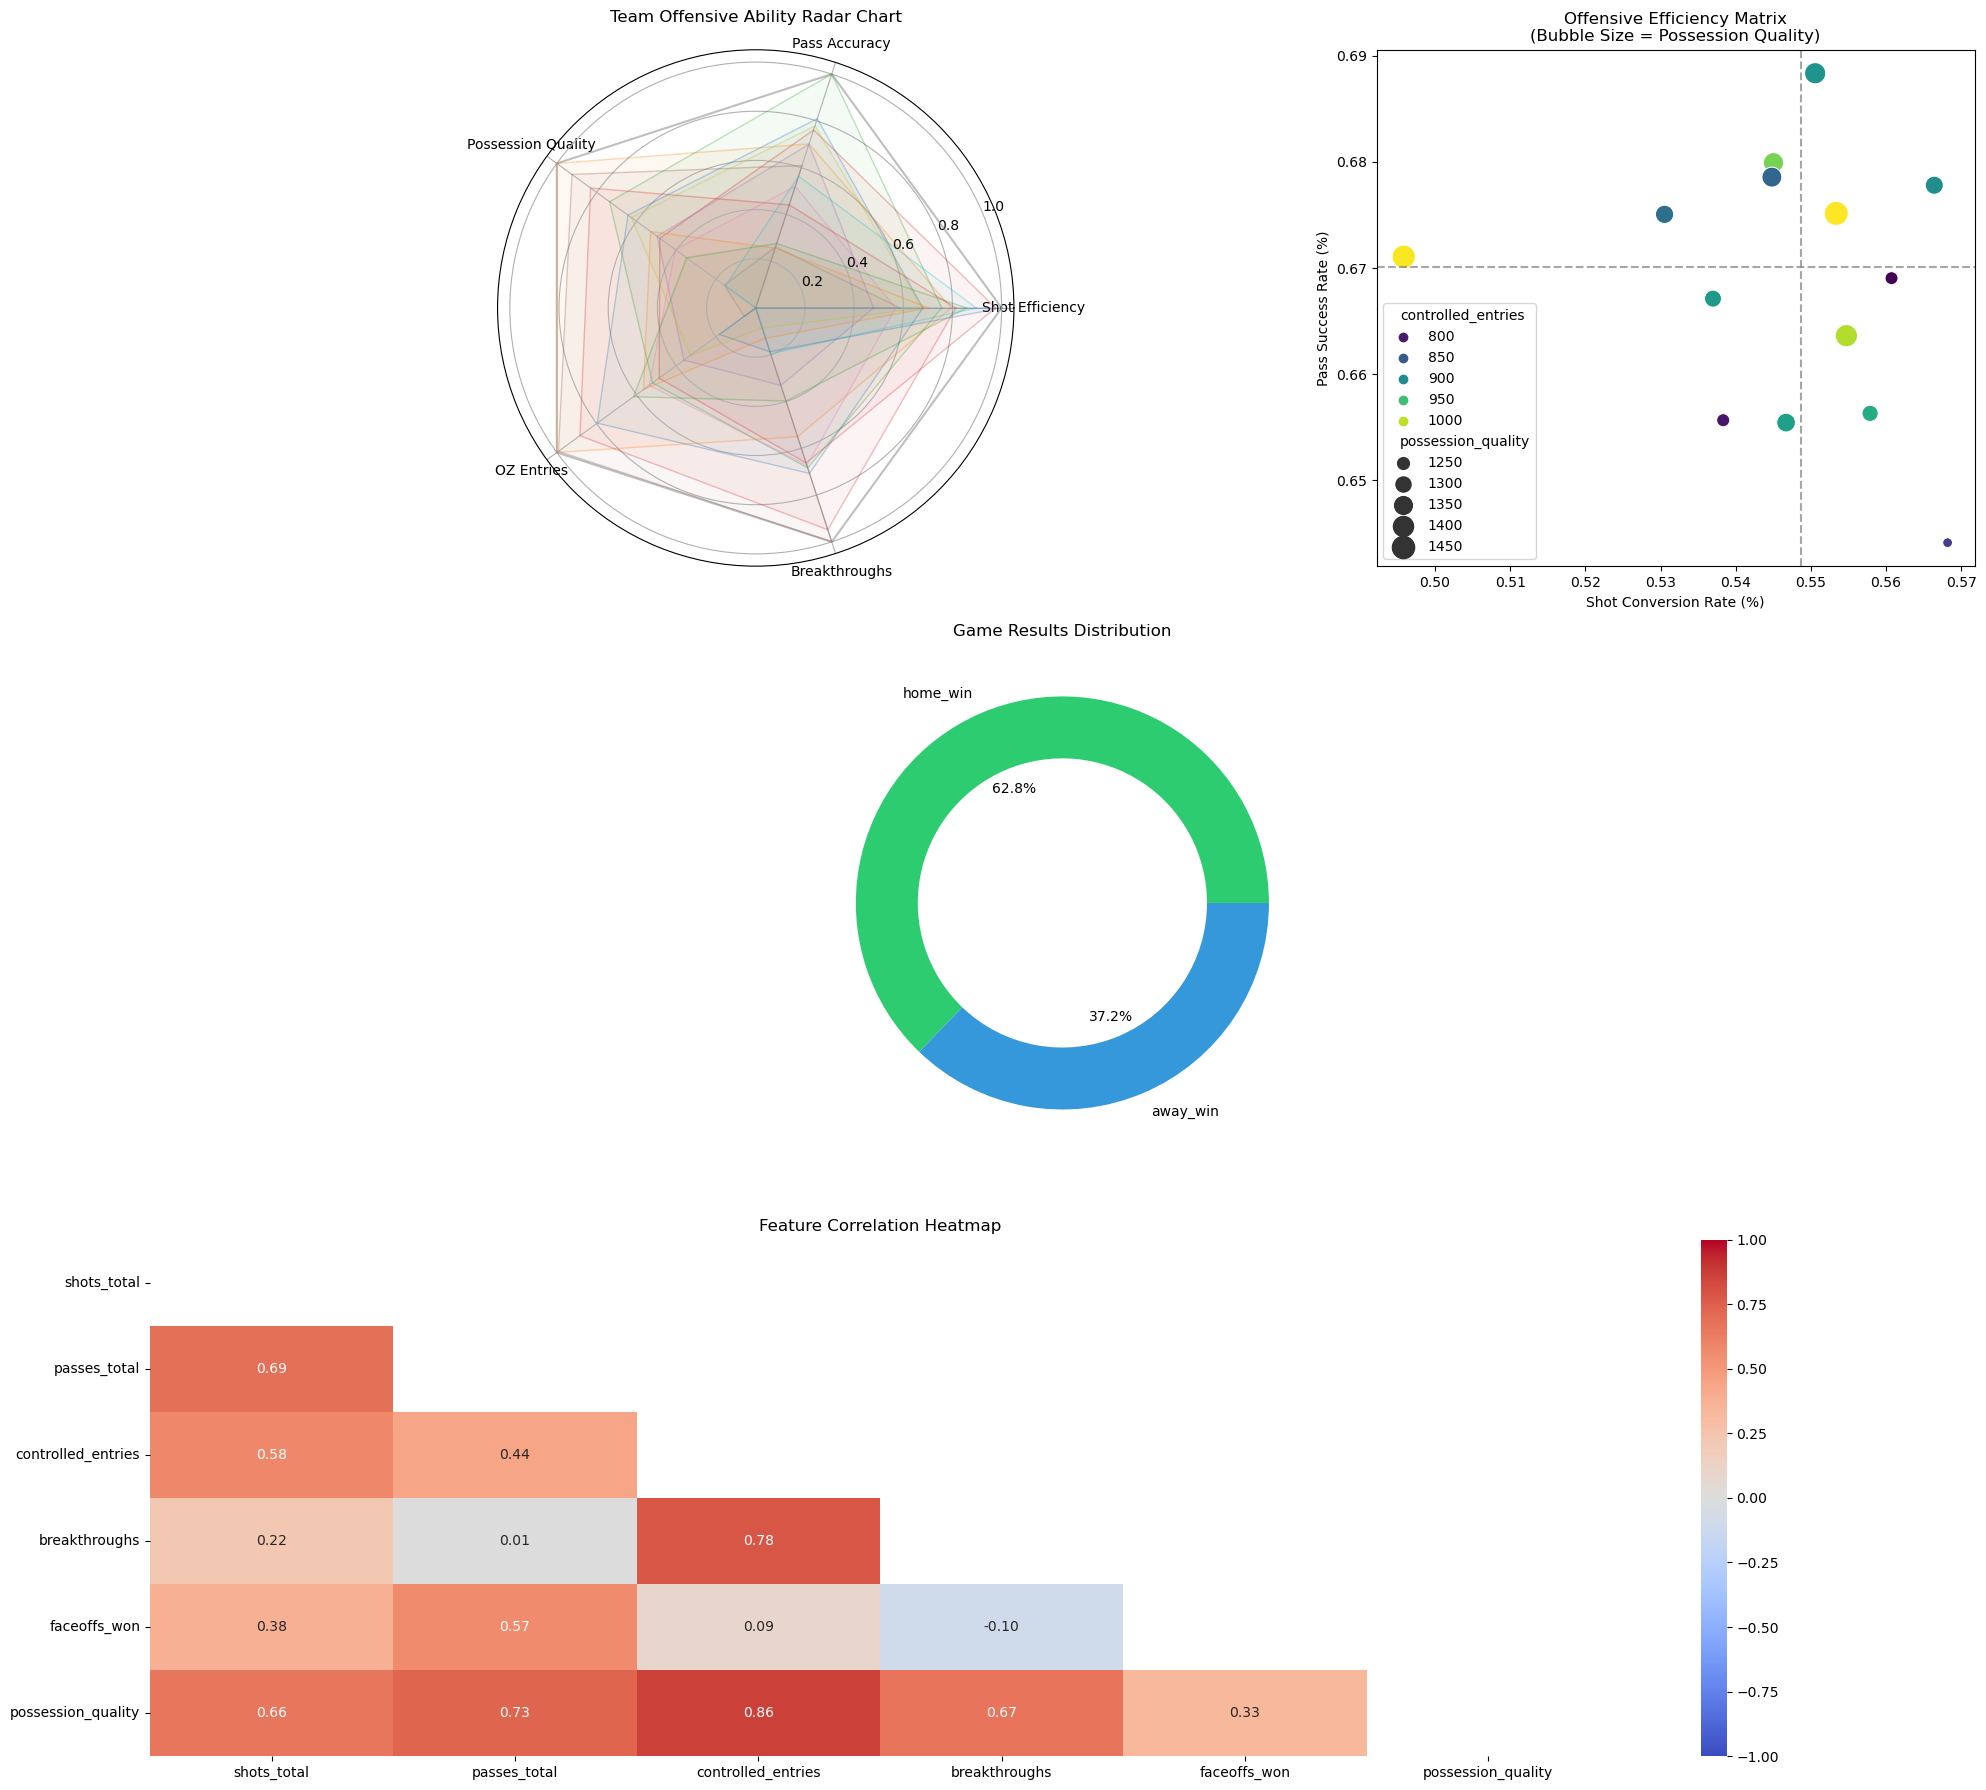

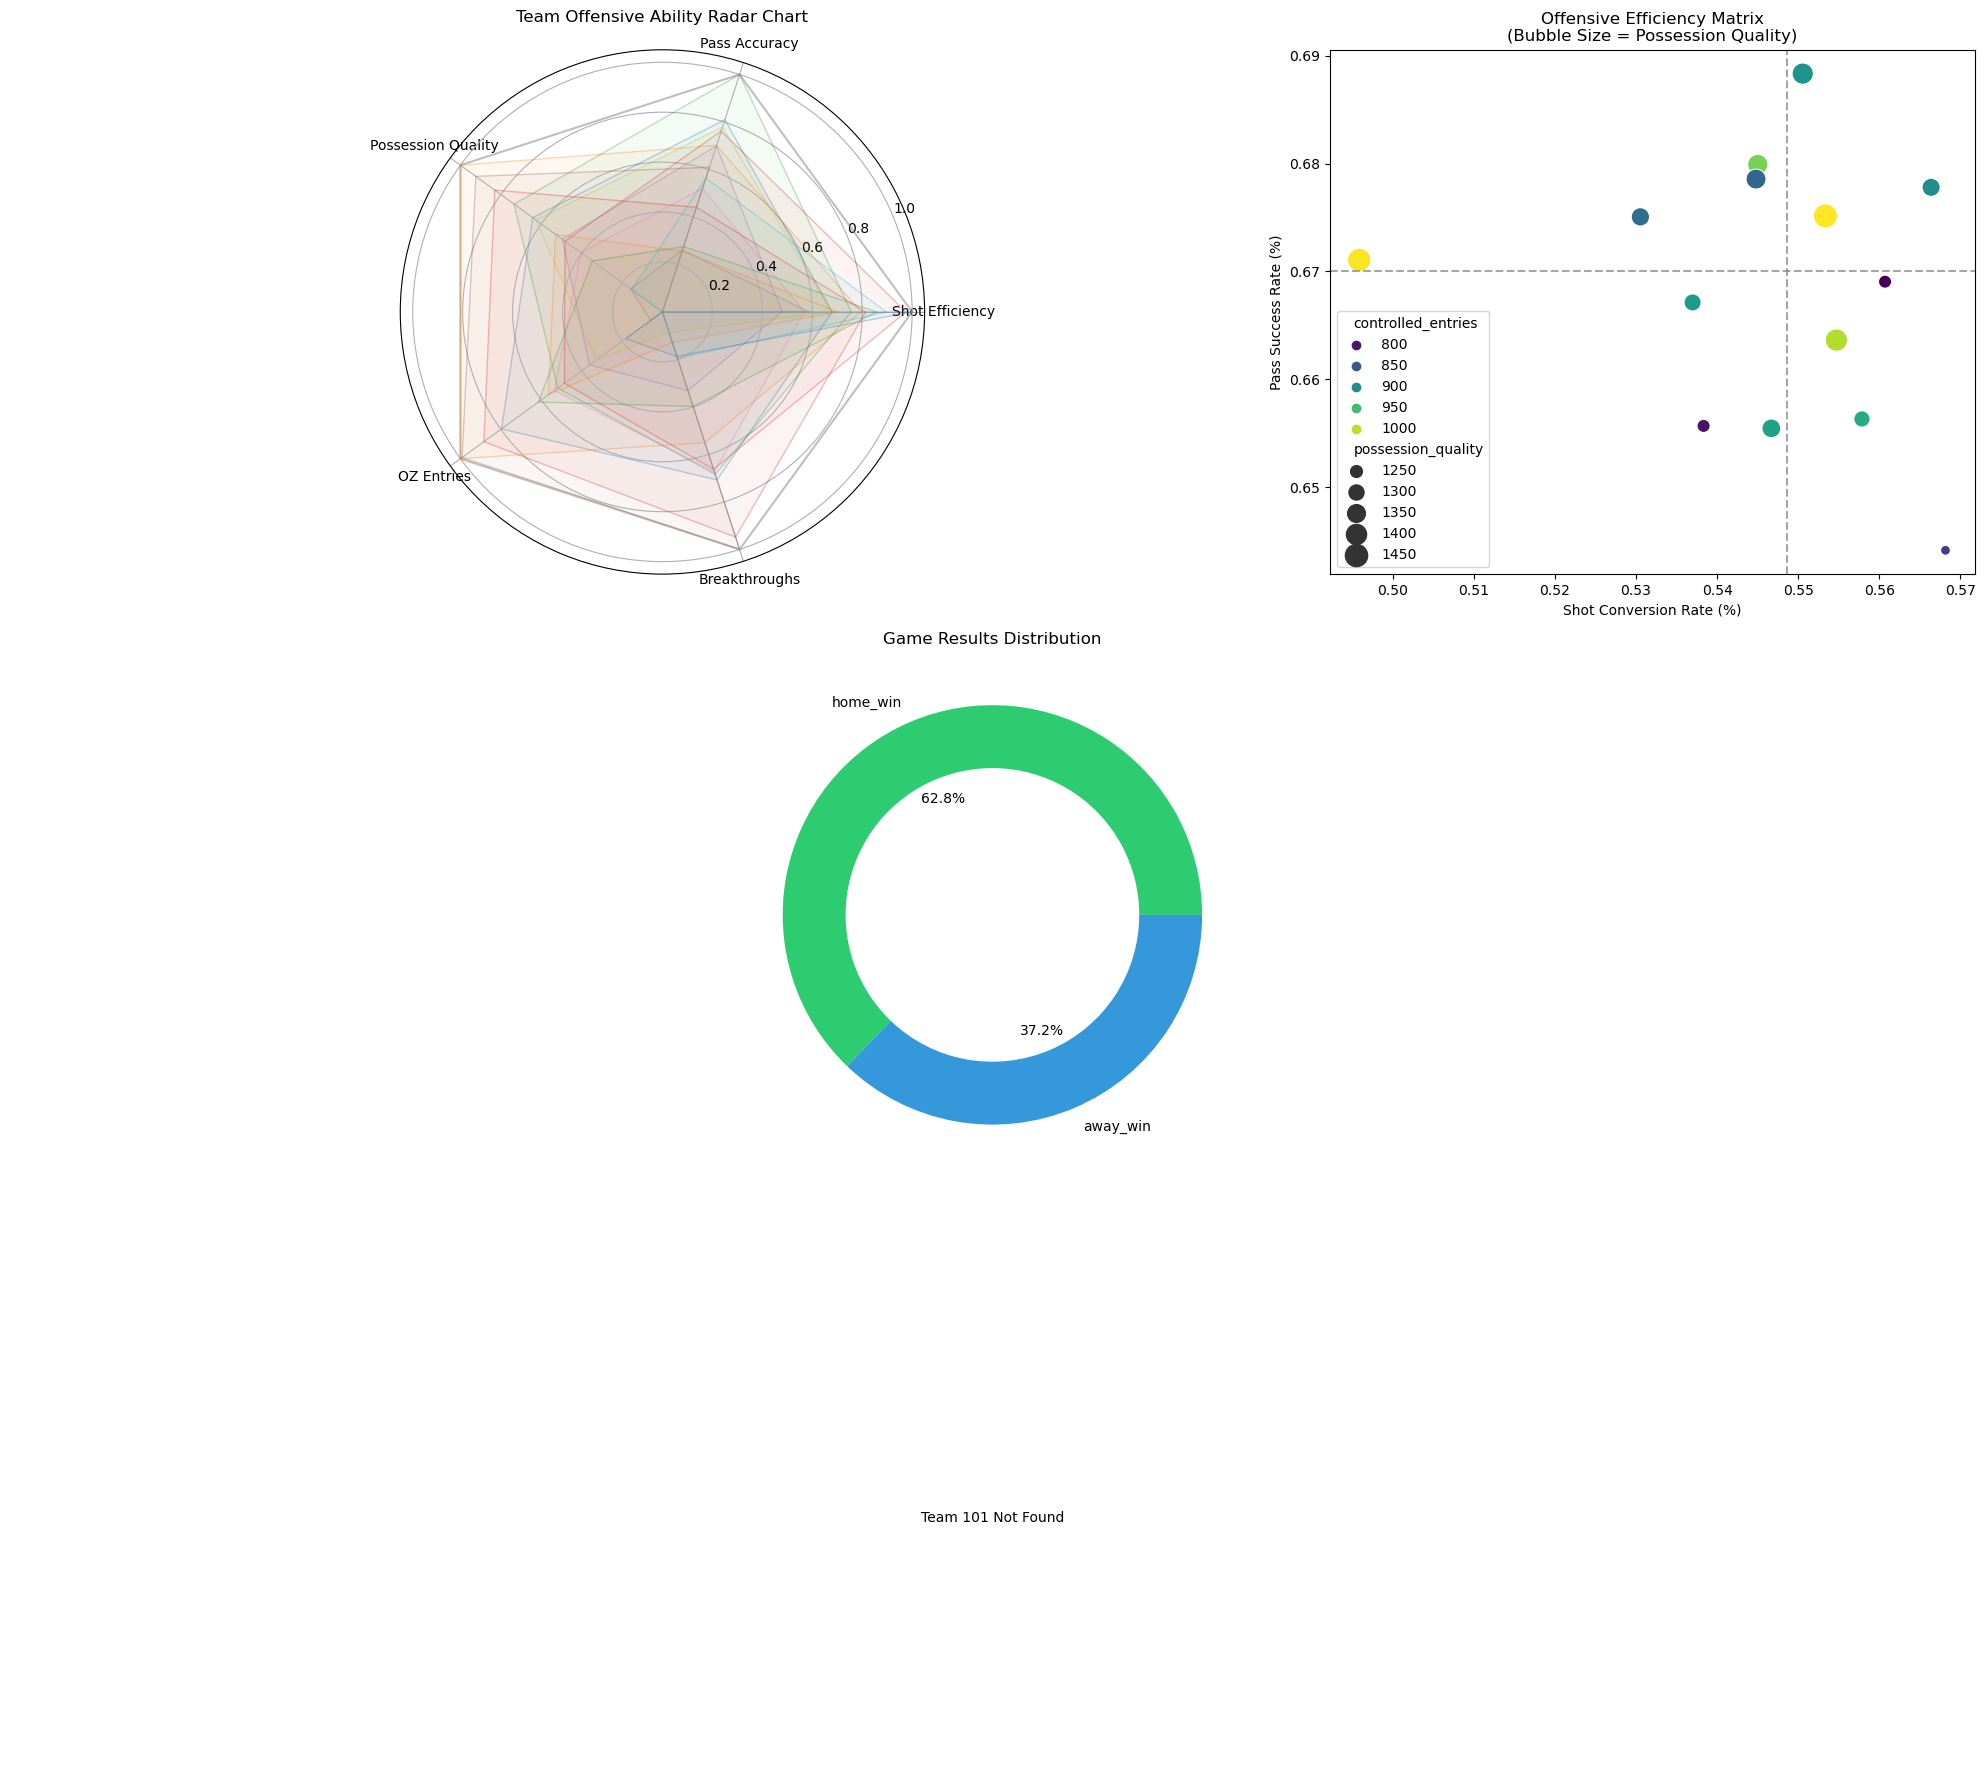

In [14]:
team_stats['controlled_entries_bin'] = pd.qcut(team_stats['controlled_entries'], 5)
team_stats['breakthroughs_bin'] = pd.qcut(team_stats['breakthroughs'], 5)


# 显示整体分析
plot_team_offense_dashboard(team_stats, game_stats)
# 生成可视化
plot_team_offense_dashboard(team_stats, game_stats, team_id=101)

# 清理临时列
team_stats.drop(['controlled_entries_bin', 'breakthroughs_bin'], axis=1, inplace=True)


In [15]:
# 探究主客场和进球位置之间的关系
